# **Identifikasi Outlier Menggunakan K-Nearest Neighbors (KNN) dalam Analisis Data**
1. Mengapa KNN Dapat Digunakan untuk Mendeteksi Outlier?

Metode K-Nearest Neighbors (KNN) didasarkan pada konsep kedekatan antar data. Dalam analisis outlier, metode ini memungkinkan kita untuk menilai seberapa jauh suatu titik dari tetangga terdekatnya dan menentukan apakah titik tersebut menyimpang dari pola umum.

Secara prinsip, KNN digunakan untuk mengidentifikasi outlier dengan pendekatan berikut:

 - Jika suatu titik memiliki sedikit tetangga dalam radius tertentu, besar kemungkinan titik tersebut adalah outlier.
 - Jika rata-rata jarak ke k tetangga terdekat sangat besar, maka titik tersebut dapat dianggap sebagai anomali.
2. Tahapan Identifikasi Outlier Menggunakan KNN

a. Mengukur Jarak Antar Titik

Jarak antar titik dihitung menggunakan metrik seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance. Perhitungan ini membantu dalam menentukan tingkat kedekatan antar titik dalam dataset.

 b. Menentukan Nilai K (Jumlah Tetangga Terdekat)

Pemilihan nilai K sangat berpengaruh terhadap hasil deteksi outlier:

 - K terlalu kecil → Model dapat terlalu sensitif terhadap noise dan kesalahan deteksi.
 - K terlalu besar → Outlier mungkin tidak terdeteksi secara optimal.
 c. Menentukan Skor Kepadatan (Density Score)

Beberapa metode yang dapat digunakan untuk mengidentifikasi outlier dengan KNN adalah:

1. K-Nearest Neighbor Distance

 - Menghitung rata-rata jarak ke K tetangga terdekat. Jika nilai rata-rata jarak ini terlalu besar, maka titik tersebut bisa dianggap sebagai outlier.
2. Local Outlier Factor (LOF)

 - LOF membandingkan kepadatan lokal suatu titik dengan kepadatan tetangganya. Jika kepadatan titik tersebut jauh lebih rendah dibandingkan dengan sekelilingnya, maka kemungkinan besar itu adalah outlier.
3. Distance-Based Outlier Score

 - Jika suatu titik memiliki sedikit tetangga dalam suatu radius tertentu, maka titik tersebut berpotensi menjadi anomali.

3. Kesimpulan

KNN merupakan teknik yang dapat diterapkan dalam eksplorasi data untuk mengidentifikasi anomali berdasarkan jarak antar titik. Metode seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF) memungkinkan kita untuk mengenali data yang memiliki pola berbeda dari mayoritas dataset. Pemilihan nilai K yang tepat serta penggunaan metrik jarak yang sesuai sangat menentukan keberhasilan deteksi outlier dengan KNN.


In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.6 MB/s eta 0:00:00


## Menjelaskan code di atas
Langkah awal menjelaskan bawa kode tersebut adalah perintah untuk menginstal dua pustaka libraries pyhton menggunkan pip, yaitu manajer paket untuk python.

- %pip install pymysql : Perintah ini menginstal pustaka pymsql. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database MySQL dari kode Pyhton.

- %pip install psycopg2 : Perintah ini menginstal pustaka psycopg2. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database PostgreSQL dari kode Pyhton.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  2     Iris-setosa          15.0         14.0          40.0         30.0     47.104565        False
  6     Iris-setosa           1.6          5.0           3.5          2.3      5.495453        False
  7     Iris-setosa           1.9          0.4           2.1          3.2      5.300000        False
  8     Iris-setosa           1.7          0.3           1.5          4.2      6.048140        False
  9     Iris-setosa           1.6          5.0           3.4          5.2      5.982474        False
 10     Iris-setosa           5.4          6.7           2.6          3.5      6.875318        False
 11     Iris-setosa           7.5          6.3           6.2          5.4      7.135825        False
 12     Iris-setosa           2.6          3.0           2.3          4.5      5.096077        False
 13     Iris-setosa           1.7          0.2           2.5          3.2      5.149757    

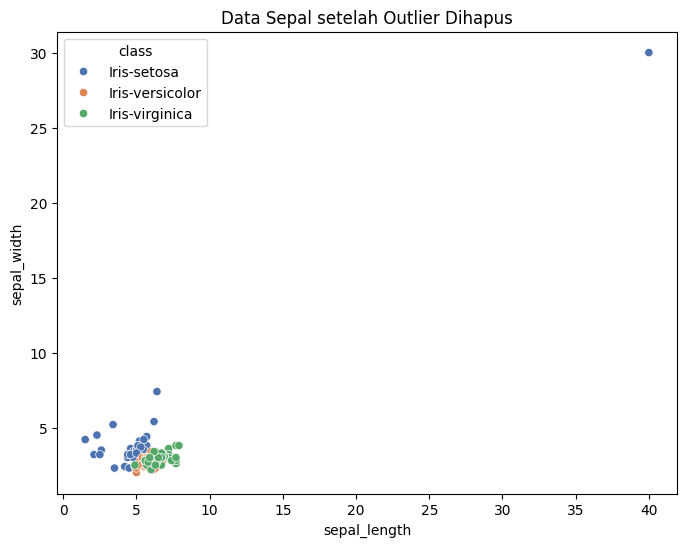

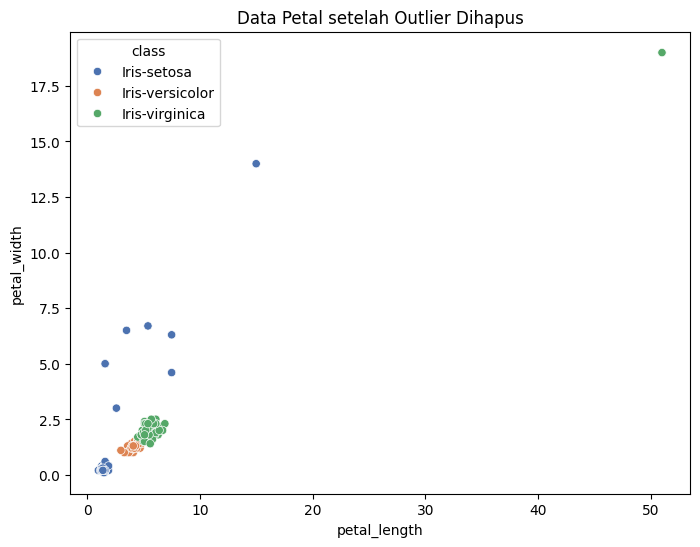

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3a2b4d8e-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_SEwXstfyAuXfxU81qVv",
        database="defaultdb",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-44ea6f9-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_Dp0q1x-sz9BpvjujgPO",
        database="iris",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=90):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal_length"], y=df_filtered["sepal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal_length"], y=df_filtered["petal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()

## **Memisahkan outlier dari data**

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3a2b4d8e-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_SEwXstfyAuXfxU81qVv",
        database="defaultdb",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-44ea6f9-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_Dp0q1x-sz9BpvjujgPO",
        database="iris",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa          64.0         45.0          63.0         53.0             -1
  2     Iris-setosa          15.0         14.0          40.0         30.0             -1
  3     Iris-setosa          26.0         64.0          57.0         42.0             -1
  4     Iris-setosa          17.0         20.0          74.0         62.0             -1
  5     Iris-setosa          24.0         30.0          21.0         45.0             -1
  6     Iris-setosa           1.6          5.0           3.5          2.3              1
  7     Iris-setosa           1.9          0.4           2.1          3.2              1
  8     Iris-setosa           1.7          0.3           1.5          4.2              1
  9     Iris-setosa           1.6          5.0           3.4          5.2              1
 10     Iris-setosa           5.4          6.7           2.6          3.5             -1
 11     Iris-setosa  

## Mejelaskan code di atas
Kode ini bertujuan untuk mengidentifikasi dan memisahkan data outlier dari dataset yang bersumber dari dua basis data, yaitu PostgreSQL dan MySQL. Proses dimulai dengan membuat koneksi ke kedua basis data menggunakan pustaka psycopg2 untuk PostgreSQL dan pymysql untuk MySQL. Setelah itu, dieksekusi perintah SQL untuk mengambil seluruh data dari tabel "iris_postgresql" dan "irismysql". Data yang diperoleh kemudian dikonversi menjadi DataFrame menggunakan pustaka pandas.

Kedua dataset tersebut kemudian digabungkan menggunakan metode inner join berdasarkan kolom "id" dan "class", sehingga hanya data yang muncul di kedua tabel yang dipertahankan. Selanjutnya, fitur numerik seperti "petal_length", "petal_width", "sepal_length", dan "sepal_width" dipilih sebagai input untuk model deteksi outlier. Model Local Outlier Factor (LOF) dari pustaka scikit-learn diterapkan dengan parameter n_neighbors=90, yang berarti bahwa setiap titik data akan dibandingkan dengan 90 tetangga terdekatnya untuk menentukan apakah termasuk dalam kategori outlier atau tidak. LOF memberikan label 1 untuk data normal dan -1 untuk data yang dianggap sebagai outlier.

Setelah model diterapkan, label outlier ditambahkan ke dalam DataFrame dengan nama kolom "outlier_label". Selanjutnya, jumlah total data yang terdeteksi sebagai outlier dihitung berdasarkan banyaknya label -1. Dataset kemudian dipisahkan menjadi dua kelompok, yaitu data yang dianggap normal (dengan label 1) yang disimpan dalam variabel df_filtered, serta data yang diklasifikasikan sebagai outlier (dengan label -1) yang disimpan dalam variabel outliers. Hasil deteksi outlier ditampilkan dengan mencetak dataset yang telah diberi label outlier, jumlah total data yang termasuk dalam kategori outlier, serta daftar data yang tetap dan yang dianggap sebagai outlier setelah proses pembersihan.

Dengan metode ini, outlier dapat dideteksi dan dihapus sebelum dilakukan analisis lebih lanjut, sehingga meningkatkan kualitas dataset dan mengurangi kemungkinan bias yang dapat memengaruhi hasil dari model pembelajaran mesin.

## **Menghitung Akurasi dari data**

In [4]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Akurasi tanpa outlier: 0.9259259259259259
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        27
      macro avg       0.93      0.92      0.92        27
   weighted avg       0.94      0.93      0.93        27



## Menjelaskan code di atas
Kode ini bertujuan untuk menganalisis dan membandingkan akurasi serta hasil klasifikasi model K-Nearest Neighbors (KNN) pada dataset yang masih mengandung outlier dan yang telah melalui proses pembersihan outlier. Langkah pertama dalam proses ini adalah mengekstrak fitur numerik yang akan digunakan dalam pemodelan dari DataFrame yang telah digabungkan sebelumnya. Selanjutnya, label kelas dikonversi ke format numerik menggunakan LabelEncoder.

Untuk mendeteksi outlier, model Local Outlier Factor (LOF) diterapkan kembali dengan parameter n_neighbors=90 dan contamination=0.1, yang berarti sekitar 10% dari data akan diklasifikasikan sebagai outlier. Hasil deteksi outlier ini kemudian ditambahkan ke dalam DataFrame, memungkinkan pembagian dataset menjadi dua bagian: satu yang masih mengandung outlier dan satu lagi yang telah dibersihkan.

Tahap berikutnya adalah membagi kedua dataset ini menjadi data latih (80%) dan data uji (20%) menggunakan fungsi train_test_split, sehingga diperoleh dua set pelatihan dan pengujian—satu dengan outlier dan satu tanpa outlier. Model KNN dengan jumlah tetangga 11 kemudian diterapkan menggunakan Pipeline, di mana langkah pertama adalah menstandarkan data dengan StandardScaler sebelum melatih model KNN. Model pertama dilatih menggunakan data yang masih memiliki outlier, kemudian diuji dengan data uji, dan hasil prediksi dibandingkan dengan label aslinya untuk menghitung akurasi serta menampilkan classification report, yang mencakup metrik seperti presisi, recall, dan F1-score untuk setiap kelas.

Proses serupa dilakukan pada dataset yang telah dibersihkan dari outlier. Hasil akhir dari kode ini mencakup dua nilai akurasi: satu untuk model yang menggunakan data dengan outlier dan satu untuk model yang menggunakan data tanpa outlier. Selain itu, classification report ditampilkan untuk menilai pengaruh keberadaan outlier terhadap performa model.

Secara umum, model yang dilatih dengan data tanpa outlier diharapkan memiliki akurasi lebih baik karena keberadaan outlier dapat mengganggu perhitungan jarak dalam algoritma KNN, sehingga memengaruhi keakuratan prediksi. Dengan membandingkan kedua hasil ini, pengguna dapat mengevaluasi dampak outlier terhadap performa model klasifikasi serta menilai efektivitas proses pembersihan data dalam meningkatkan akurasi model.

## Visualisasi data

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



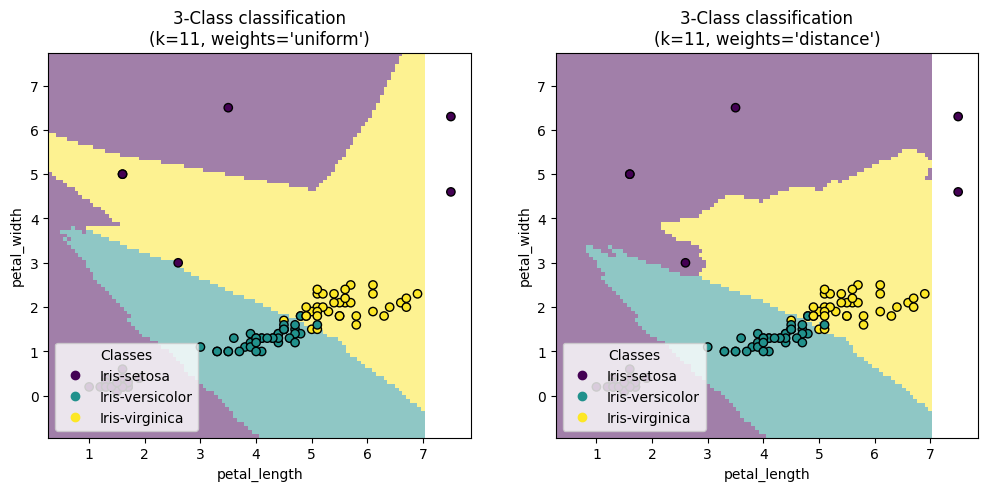

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.7777777777777778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      0.56      0.62         9
 Iris-virginica       0.60      0.75      0.67         8

       accuracy                           0.78        27
      macro avg       0.77      0.77      0.76        27
   weighted avg       0.79      0.78      0.78        27



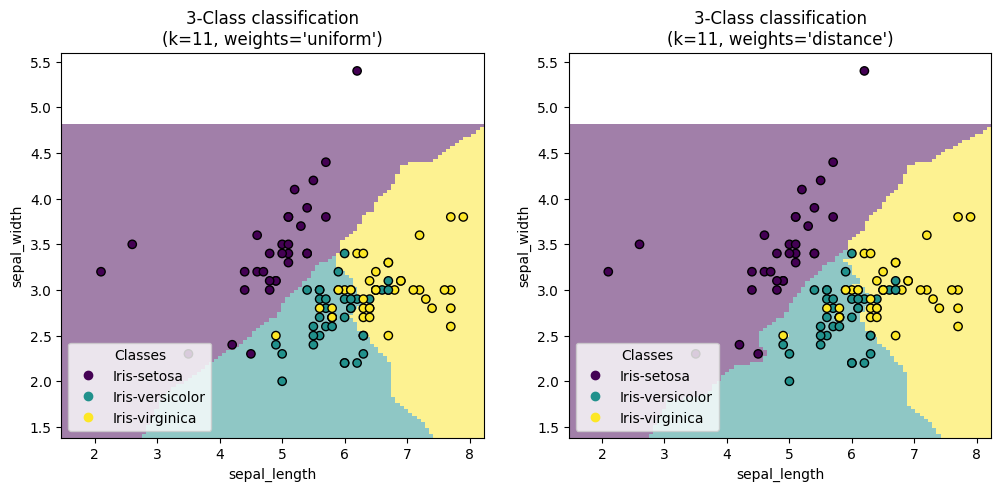

In [6]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


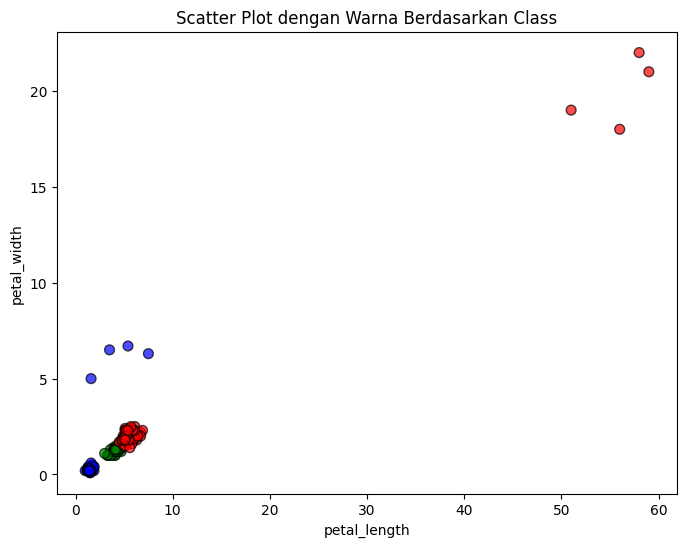

In [7]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

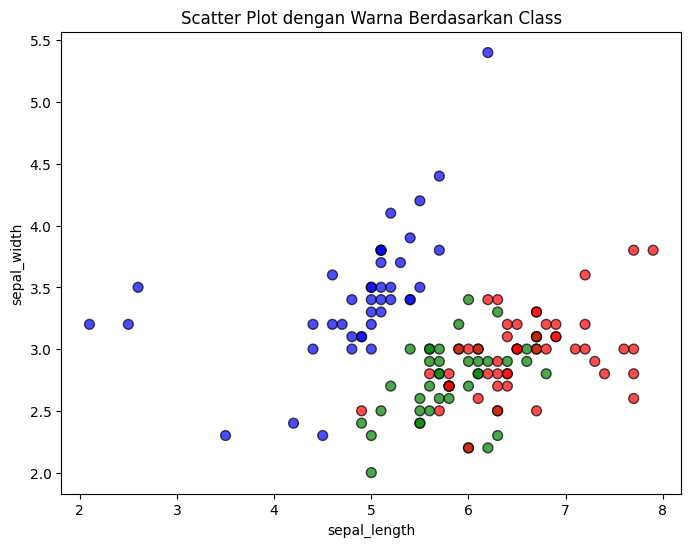

In [8]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal_length"
y_feature = "sepal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()